# Echantillonnage direct de l'espace des motifs

                                       Marie Jassigneux  Pierre-Henri Chupin.

L’objectif  de  ce  TP  est  d’implémenter  dans  le  langage  de  votre  choix  (Python,  Java,  C++,  etc.)  et d’appliquer les algorithmes d’échantillonnage introduits dans cet article, notamment l’échantillonnage de motifs par rapport à la **fréquence** et à l’**aire** :

## Les imports et fonctions communes

Pendant tout le TP, nous utilisons des bibliothèques et des fonctions qui sont communues à différentes questions du sujet. Nous les avons donc regroupé ici.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

# cela permet de charger le fichier
# On fait en sorte de modifier les données en les convertissant en int pour les utiliser plus facilement
def upload_file(nom_fichier):
    fichier = open(nom_fichier)
    data = []
    for ligne in fichier:
        #ici le split permet de séparer le string en list
        nouvelle_valeur = [int(x) for x in ligne.split()]
        data.append(nouvelle_valeur)
    return data

def motifs_doublon(motif_Unique, motifs):
    for i in motifs:
        if i not in motif_Unique:
            return False # il n'est pas en double
    return True # il est en double

## Implémenter l'algorithme d'échantillonnage des motifs fréquents

In [2]:
def calcul_frequence_algo_frequence(dataset):
    for i in dataset:
        w_FBased.append(math.pow(2,abs(len(i))))
    for j, val in enumerate(w_FBased):
        f_FBased.append(val/sum(w_FBased))
    return f_FBased

def algorithme_frequence(dataset):
    double = True
    motifs = []
    motifs_Unique = []
    for i in dataset:
        for j in i:
            choix = random.randint(0, 1)
            if choix == 1:
                motifs.append(j)
        if not motifs_doublon(motifs_Unique,motifs):
            motifs_Unique.append(motifs)
        motifs = []
    #print("Motifs Retenu : ", motifs_Unique)
    return motifs_Unique

---
## Implémenter l'algorithme d'échantillonnage basé sur l'aire

In [3]:
def calcul_frequence_algo_aire(dataset):
    for i in dataset:
        w_ABased.append(abs(len(i))* math.pow(2,(abs(len(i))-1)))
    for j, val in enumerate(w_ABased):
        f_ABased.append(val/sum(w_ABased))
    return f_ABased

def algorithme_aire(dataset):
    double = True
    iterateur = 0
    taille =[0 for t in dataset]
    # Motifs sans doublons
    motifs_Unique = []

    for i in dataset:
        compteur = 0
        choix = random.uniform(0, 1)
        for j in range(len(i)):
            compteur += j + 1
            if choix <= compteur/len(i)*2:
                taille[iterateur] = compteur
                break
        motifs = random.sample(i, taille[iterateur])
        if not motifs_doublon(motifs_Unique, motifs):
            motifs_Unique.append(motifs)
        iterateur += 1
    return motifs_Unique

---
La méthode proposée retourne des motifs (réalisations) à la demande. Toutes fois, aucune information sur le motif autre que sa syntaxe n'est donnée (i.e, la fréquence n'est pas communiquée).
## Ecrire une fonction qui étant données k réalisations, retourne les valeurs réelles de la fréquence et/ou l'aire en  une seule passe sur les données.

In [4]:
def freq(motifs,motif_Unique):
    frequence= [0 for i in motif_Unique]
    cmpt = [0 for i in motif_Unique]
    for i in motifs:
        for j, val in enumerate(motif_Unique):
            if motifs_doublon(i,val):
                cmpt[j] += 1
    n = len(motifs)
    for i, value in enumerate(cmpt):
        frequence[i] = value/n
    return frequence

---
## Tester avec des données réelles
Attention de ne pas considérer des jeux de données aux caractéristiques particulières
* https://bitbucket.org/anesbendimerad/sigibbssamplingcode/src/master/ItemsetDatasets/
* http://fimi.ua.ac.be/data/
* http://www.philippe-fournier-viger.com/spmf/index.php?link=datasets.php

In [7]:
if __name__ == "__main__":
    w_FBased = []
    f_FBased = []
    w_ABased = []
    f_ABased = []
    filename='chess.dat'
    data = upload_file(filename)
    k = 5
    print("algorithme de fréquence")
    print("")
    f_FBased = calcul_frequence_algo_frequence(data)
    d_freq = random.choices(data,f_FBased, k=k)
    print(d_freq)
    print("")
    motifs_freq = algorithme_frequence(d_freq)
    frequence_motif = freq(data, motifs_freq)
    print("fréquence des motifs choisis : ")
    print(frequence_motif)
    print("Motifs choisi : ")
    print(motifs_freq)


algorithme de fréquence

[[1, 3, 5, 7, 10, 12, 14, 15, 17, 19, 22, 23, 25, 28, 29, 31, 34, 36, 38, 40, 42, 45, 46, 48, 50, 52, 55, 56, 58, 60, 62, 64, 66, 68, 70, 72, 75], [1, 3, 5, 7, 9, 11, 14, 15, 17, 19, 21, 23, 25, 28, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 55, 56, 58, 60, 62, 64, 66, 68, 71, 72, 74], [1, 3, 5, 7, 9, 12, 13, 16, 18, 20, 21, 23, 25, 27, 29, 31, 34, 36, 39, 40, 42, 44, 46, 48, 50, 52, 55, 56, 58, 60, 62, 64, 66, 68, 71, 72, 75], [1, 3, 5, 7, 9, 11, 14, 16, 17, 20, 21, 24, 25, 27, 29, 31, 34, 36, 39, 40, 43, 44, 47, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 71, 72, 74], [2, 3, 5, 7, 9, 11, 13, 15, 17, 20, 21, 24, 25, 27, 29, 31, 34, 36, 39, 40, 43, 44, 47, 48, 50, 52, 54, 56, 58, 60, 62, 65, 66, 69, 70, 73, 74]]

fréquence des motifs choisis : 
[0.0009386733416770963, 0.01095118898623279, 0.0006257822277847309, 0.0018773466833541927, 0.005632040050062578]
Motifs choisi : 
[[1, 7, 12, 19, 22, 28, 31, 36, 40, 50, 52, 62, 68, 75], [1, 3, 5, 14, 15, 17, 21, 31

---
## Mettre en place une étude empirique (sur au moins 4 jeux de données réels + éventuellement 2 synthétiques) afin de vérifier la qualité de l'échantillonnage, notamment en permettant de répondre aux questions suivantes:
* Est-ce que les motifs sont bien tirés proportionnellement à leur mesure (e.g., plus il est fréquent, plus sa probabilité d'être tirer est grande, idem pour l'aire).
* Est-ce la méthode d'échantillonnage qui permet d'obtenir une bonne diversité tirés ?

pour le fichier  connect.dat



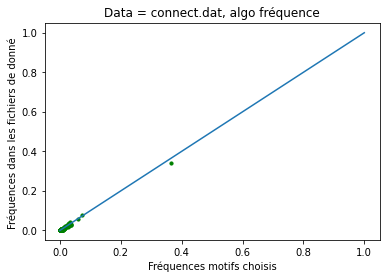

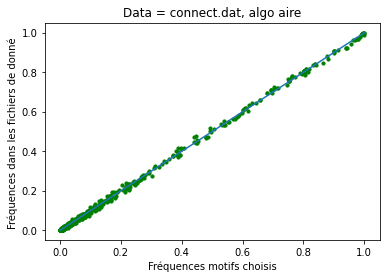

Diversité avec l'algorithme de fréquence:
0.0010000000000000007

Diversité avec l'algorithme d'aire:
0.01339299999999987

pour le fichier  chess.dat



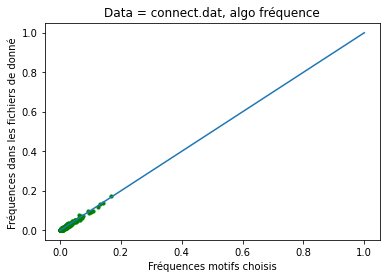

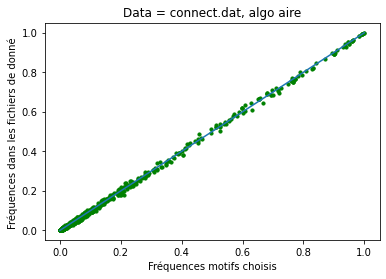

Diversité avec l'algorithme de fréquence:
0.0010000000000000007

Diversité avec l'algorithme d'aire:
0.01622899999999989

pour le fichier  mushroom.dat



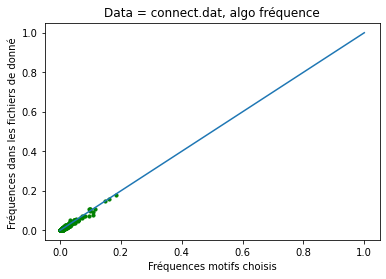

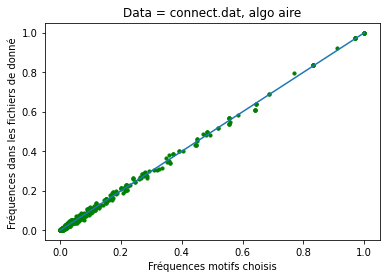

Diversité avec l'algorithme de fréquence:
0.0010199999999999986

Diversité avec l'algorithme d'aire:
0.013097999999999898

pour le fichier  pumsb.dat



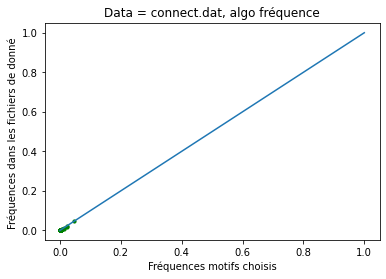

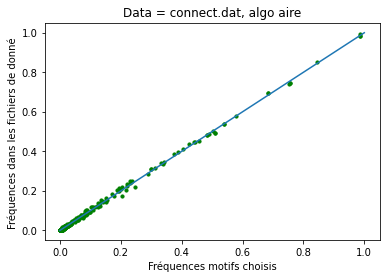

Diversité avec l'algorithme de fréquence:
0.0010000000000000007

Diversité avec l'algorithme d'aire:
0.006412000000000106

pour le fichier  pumsb_star.dat



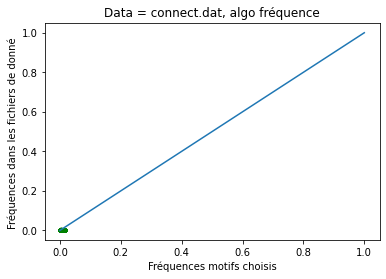

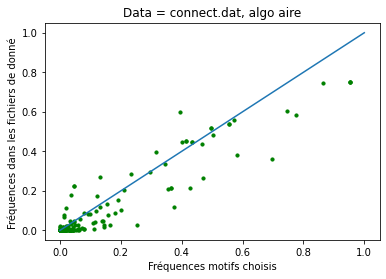

Diversité avec l'algorithme de fréquence:
0.0010000000000000007

Diversité avec l'algorithme d'aire:
0.0051950000000000225



In [6]:
    #ici on regarde si les motif tiré sont bien proportionelle à leur mesure
    k=1000
    f1='connect.dat'
    f2='chess.dat'
    f3='mushroom.dat'
    f4='pumsb.dat'
    f5='pumsb_star.dat'
    tab_f=[f1,f2,f3,f4,f5]
    for f in tab_f:
        print("pour le fichier ", f)
        print("")
        data = upload_file(f)
        w_FBased = []
        f_FBased = []
        w_ABased = []
        f_ABased = []
        # frequence
        f_FBased = calcul_frequence_algo_frequence(data)
        d_freq = random.choices(data,f_FBased, k=k)
        motifs_freq = algorithme_frequence(d_freq)
        x = freq(d_freq, motifs_freq)
        y = freq(data, motifs_freq)
        s = 10
        plt.scatter(x, y, s, c="g")
        plt.xlabel("Fréquences motifs choisis")
        plt.ylabel("Fréquences dans les fichiers de donné ")
        plt.title('Data = {0}, algo fréquence'.format(filename))
        plt.plot([1,0],[1,0])
        plt.show()
        
        # aire
        f_ABased = calcul_frequence_algo_aire(data)
        d_air = random.choices(data,f_ABased, k=k)
        motifs_air = algorithme_aire(d_air) 
        x = freq(d_air, motifs_air)
        y = freq(data, motifs_air)
        s= 10
        plt.scatter(x, y, s, c="g")
        plt.xlabel("Fréquences motifs choisis")
        plt.ylabel("Fréquences dans les fichiers de donné ")
        plt.title('Data = {0}, algo aire'.format(filename))
        plt.plot([1,0],[1,0])
        plt.show()

        #ici on regarde si il y a une bonne diversité tirés
        #calcul_frequence_algo_frequence(data)
        d_freq = random.choices(data,f_FBased, k=k)
        motifs_freq = algorithme_frequence(d_freq)
        print("Diversité avec l'algorithme de fréquence:")
        f_freq = freq(data, motifs_freq)   
        diversite = sum(f_freq)/len(f_freq)
        print(diversite)
        print("")

        #calcul_frequence_algo_aire(data)
        d_air = random.choices(data,f_ABased, k=k)
        motifs_air = algorithme_aire(d_air)
        print("Diversité avec l'algorithme d'aire:")
        f_air = freq(data, motifs_air)   
        diversite = sum(f_air)/len(f_air)
        print(diversite)
        print("")


* **Est-ce que les motifs sont bien tirés proportionnellement à leur mesure (e.g., plus il est fréquent, plus sa probabilité d'être tirer est grande, idem pour l'aire)**  
Pour réussir à montrer que les motifs tirés sont proportionnelle à leur mesure, il faut récuperer la fréquence de tout les motifs tirés et de la comparer à la fréquence des motifs dans le fichier source.  
Du coup on trace une droite représentative passant par tous les points (qui correspondent aux différentes valeur obtenus). Si les motifs tirés sont proporotionelle à leur mesure alors la droite qu'on obtient correspond presque à la droite d'équation X = Y où X sera ici la fréquence du motifs choisit et Y la fréquence du motifs dans le fichier source. Et on remarque que sur nos différents echantillonage, on obtient des nuages de points proche de la droite  X = Y. On peut donc dire que nos motifs sont tirés propotionnellement à leur mesure.  
  
* **Est-ce la méthode d'échantillonnage qui permet d'obtenir une bonne diversité tirés ?** 
Oui car on utilise la méthode d'échantillonnage (donc soit l'algorithme de fréquence ou donc soit l'algorithme d'aires) pour récuperer une liste de motifs puis on calcule la fréquence des motifs récupérés. On fait la somme de toutes ces fréquences puis on la divise par le nombre de fréquence différentes. Si ce résultat est proche de zéro cela veut dire qu'on a une bonne diversité et sinon cela veut dire qu'on a des motfs trop fréquemment pris.

---
## Comment se comporte l'algorithme sur des jeux de données contenant au moins une transaction beaucoup plus grande que les autres ? (e.g., Kosarak). Proposer et implémenter une solution

```
(data) chupin@chupin-LIFEBOOK-S762:~/Documents/M2_IA/data$ /home/chupin/.local/share/virtualenvs/data-be2aIMTc/bin/python /home/chupin/Documents/M2_IA/data/TP.py
Traceback (most recent call last):
  File "/home/chupin/Documents/M2_IA/data/TP.py", line 176, in <module>
    f_FBased = calcul_frequence_algo_frequence(data)
  File "/home/chupin/Documents/M2_IA/data/TP.py", line 45, in calcul_frequence_algo_frequence
    w_FBased.append(math.pow(2,abs(len(i))))
OverflowError: math range error
```  

Il y a une erreur d'overflow qui apparait quand on calcul le poids. Cela vient du fait que la transaction est beaucoup plus grande que les autres quand on veut calculer son poids et crée donc un overflow. Même sans ce problème d'overflow on aurait quand même un autre problème car l'action beaucoup plus grande que les autres aurait un poid si grand qu'il sera toujours selectionné.  

Nous avons donc penser à une solution pour résoudre ce problème : calculer la moyenne des tailles de toutes les transactions pour pouvoir avoir une limite sur le choix des transactions à calculer. Ainsi, on ne calculera plus que les transactions de tailler inférieure à cette moyenne.

In [9]:
def kosara_resolution(filename):
    sample=upload_file(filename)
    w_FBased=[]
    w_ABased=[]
    taille=[]
    tab=[]
    
    for i,v in enumerate(sample):
        taille.append(len(v))
    moyenne = np.average(taille)
    print("moyenne:",moyenne)

    for i,v in enumerate(sample):
        if(len(v) <= moyenne):
            tab.append(v)
            w_FBased.append(math.pow(2,abs(len(v)))) #le calcul poid Fréquence
            w_ABased.append(abs(len(v))* math.pow(2,(abs(len(v))-1))) #le calcul poid Aire 
    #ici on le fait just pour k = 1 car c'est surtout pour tester si il réussi à passer le problème d'avant dans le calcul du poids
    k = 1
    
    print("fréquence")
    d_freq = random.choices(tab,w_FBased, k=k)
    print("motif")
    motifs = algorithme_frequence(d_freq)
    print(motifs)
    
    print("Aire")
    d_air = random.choices(tab,w_ABased, k=k)
    print("motif")
    motifs = algorithme_aire(d_air)
    print(motifs)
    
kosara_resolution("kosarake.txt")

moyenne: 16.906748100700135
fréquence
motif
[[504, -1, -2]]
Aire
motif
[[6, -1, -1, -1, -1, -1]]


### *(Bonus)* 7. Implémenter l'algorithme 3, et afficher la distribution de 1000 réalisations.

### *(Bonus++)* 8. Imaginer un algorithme d'échantillonnage s'appuyant sur une autre mesure.